In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns       
from sqlalchemy import create_engine    
import warnings
warnings.filterwarnings('ignore')   
import scipy.stats as stats
import scipy.stats as ttest_ind


In [6]:
from injestion import engine

In [7]:
df=pd.read_sql('select * from vendor_sales_summary', engine )

In [9]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


 # Exploratory Data Analysis
--Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.


--In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [11]:
# summery statitistics

df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


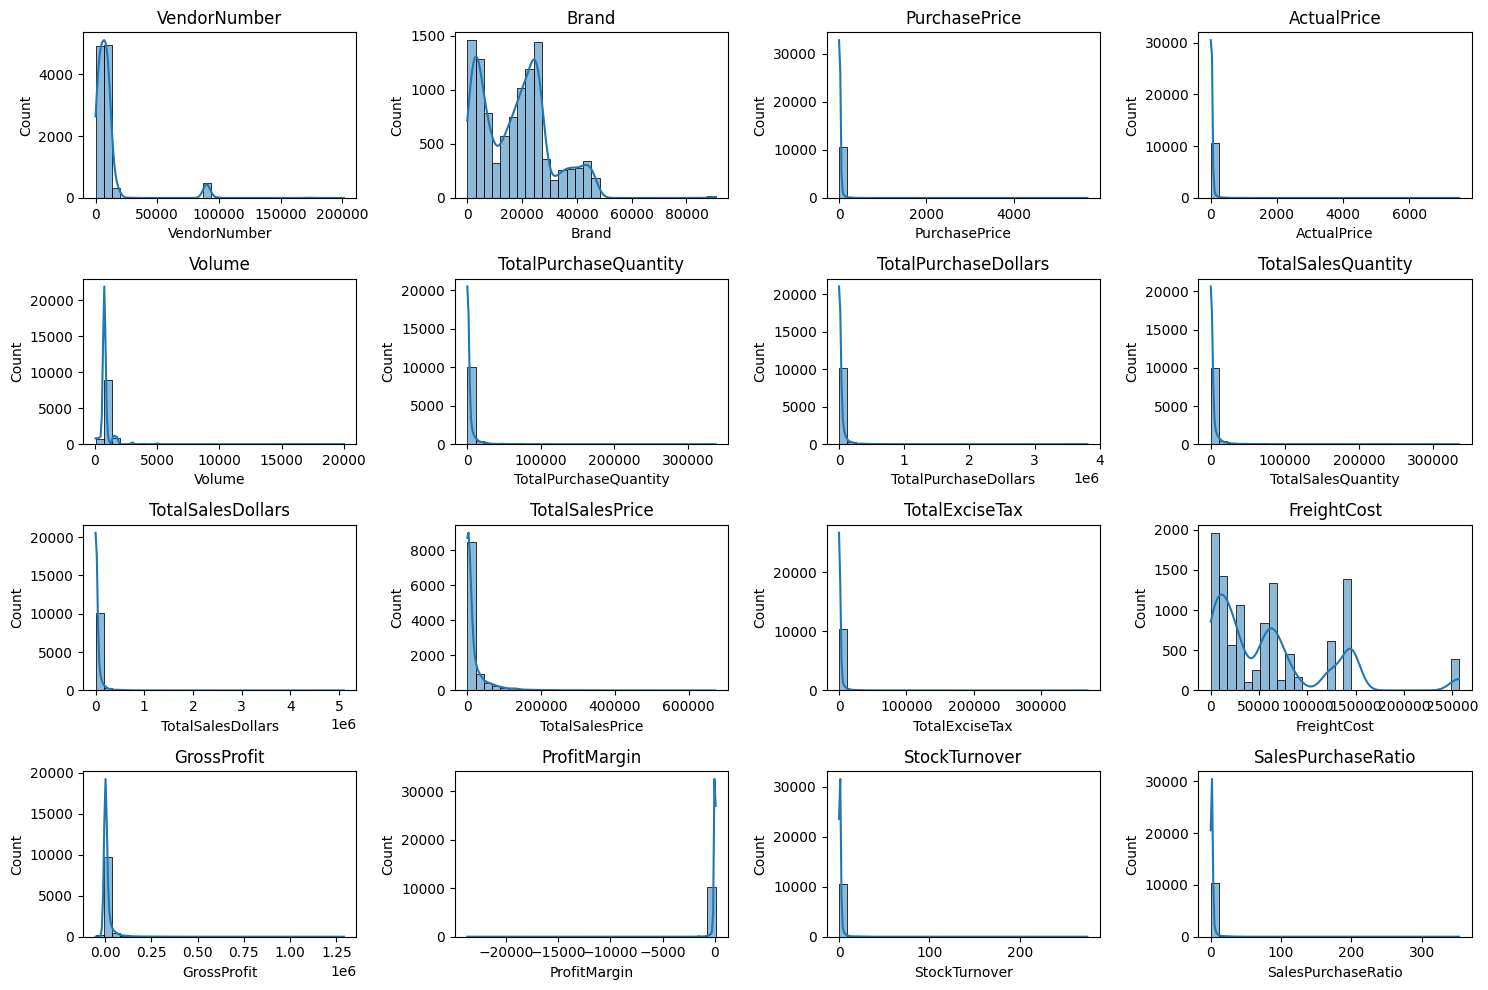

In [13]:
numerical_cols = df.select_dtypes(include=np.number).columns


plt.figure(figsize=(15, 10))  # Adjust grid layout as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

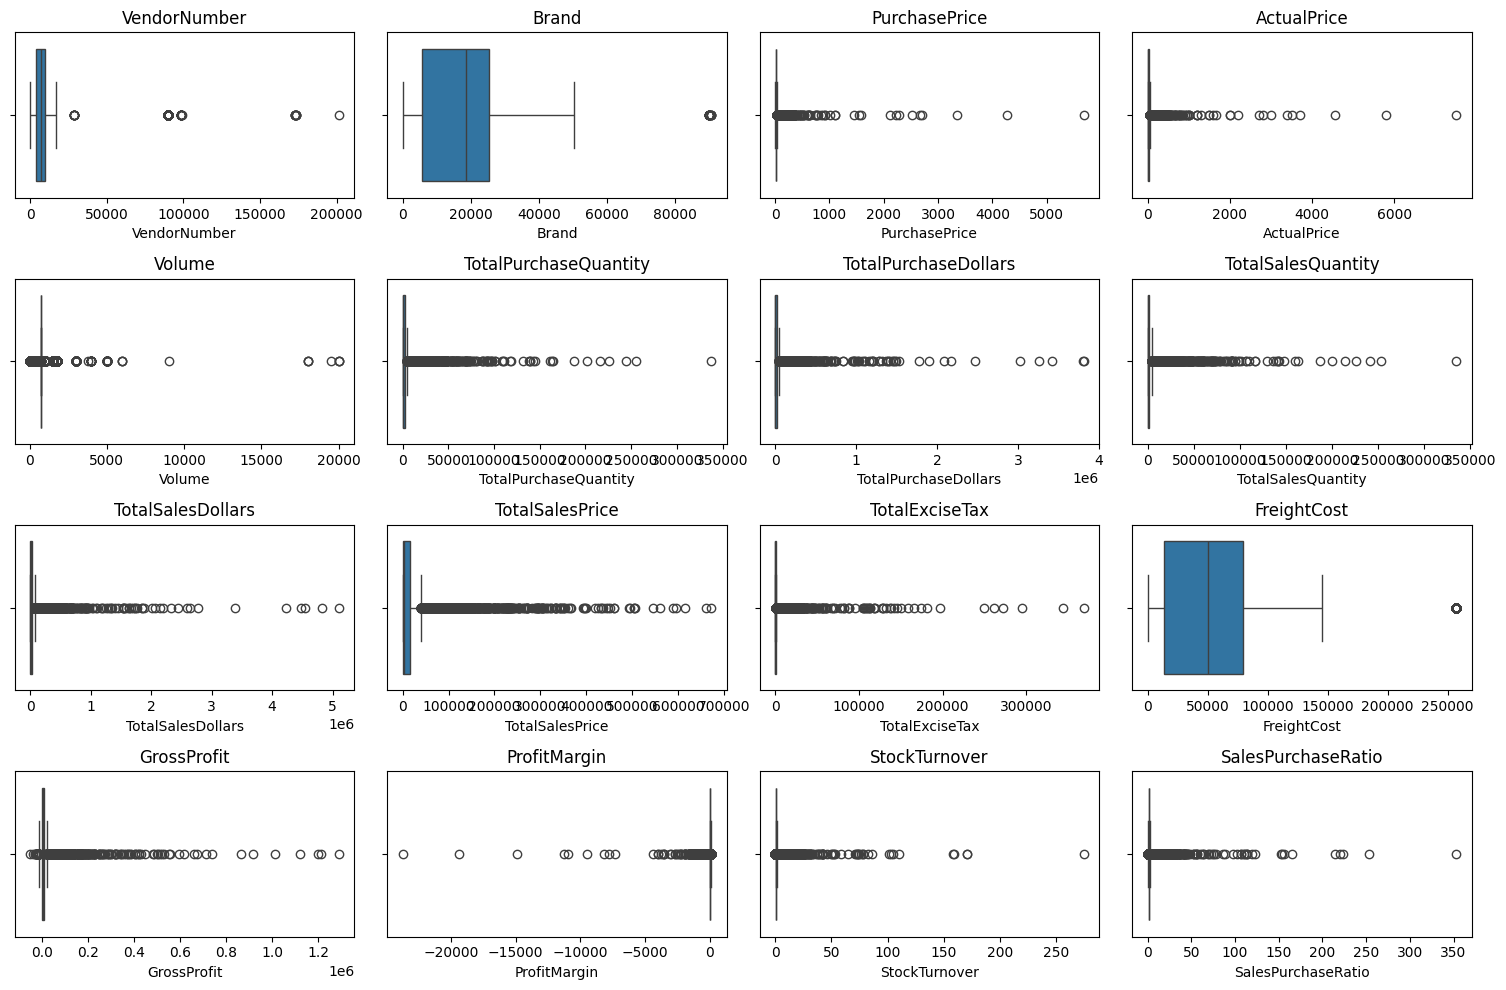

In [14]:
# outliers detection with boxplot
plt.figure(figsize=(15, 10))  # Adjust grid layout as needed
for i, col in enumerate(numerical_cols):    
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)                                      
plt.tight_layout()
plt.show()

# Summary Statistics Insights:

Negative & Zero Values:

--Gross Value: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.


--Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.


--Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.


Outliers Indicated by High Standard Deviations:

--Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential   premium products.


--Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.


--Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely.

--A value more than 1 indicates that the sold quantity for that product is higher than the purchased quantity due to either sales being        fulfilled from older stock.

In [19]:
# filter the data by removing inconsistent data
df=pd.read_sql('''select * from vendor_sales_summary
                where "GrossProfit" > 0 and
               "ProfitMargin" > 0 and 
               "TotalSalesQuantity" >0 
               ''',engine)

In [20]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080.0,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038.0,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407.0,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682.0,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109.0,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2.0,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1.0,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


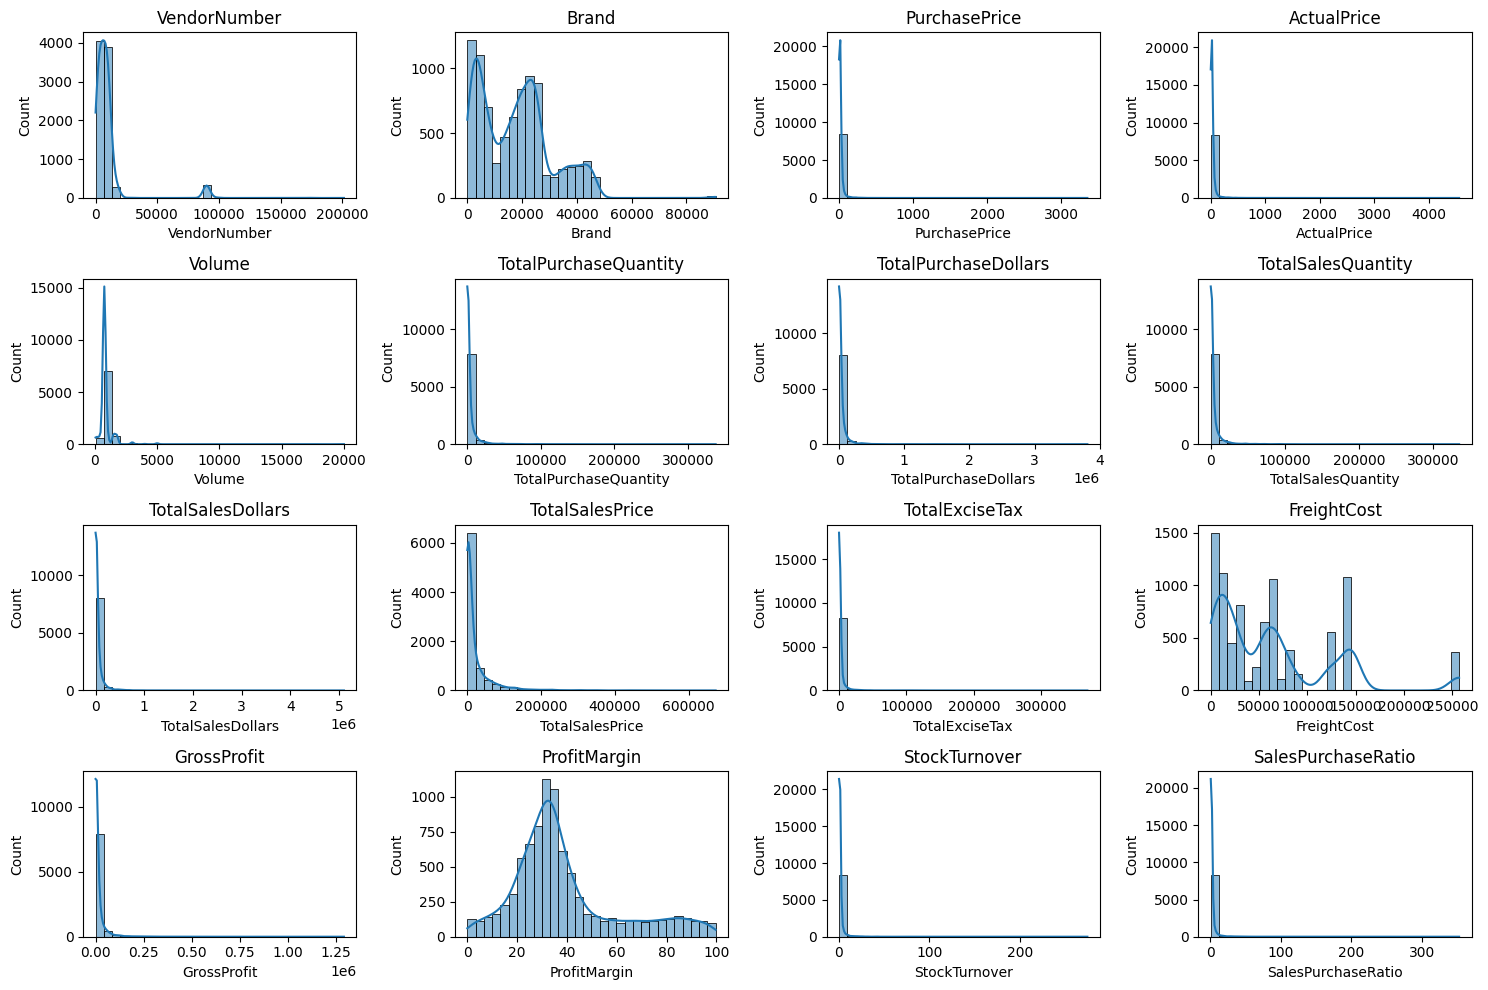

In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns


plt.figure(figsize=(15, 10))  # Adjust grid layout as needed
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

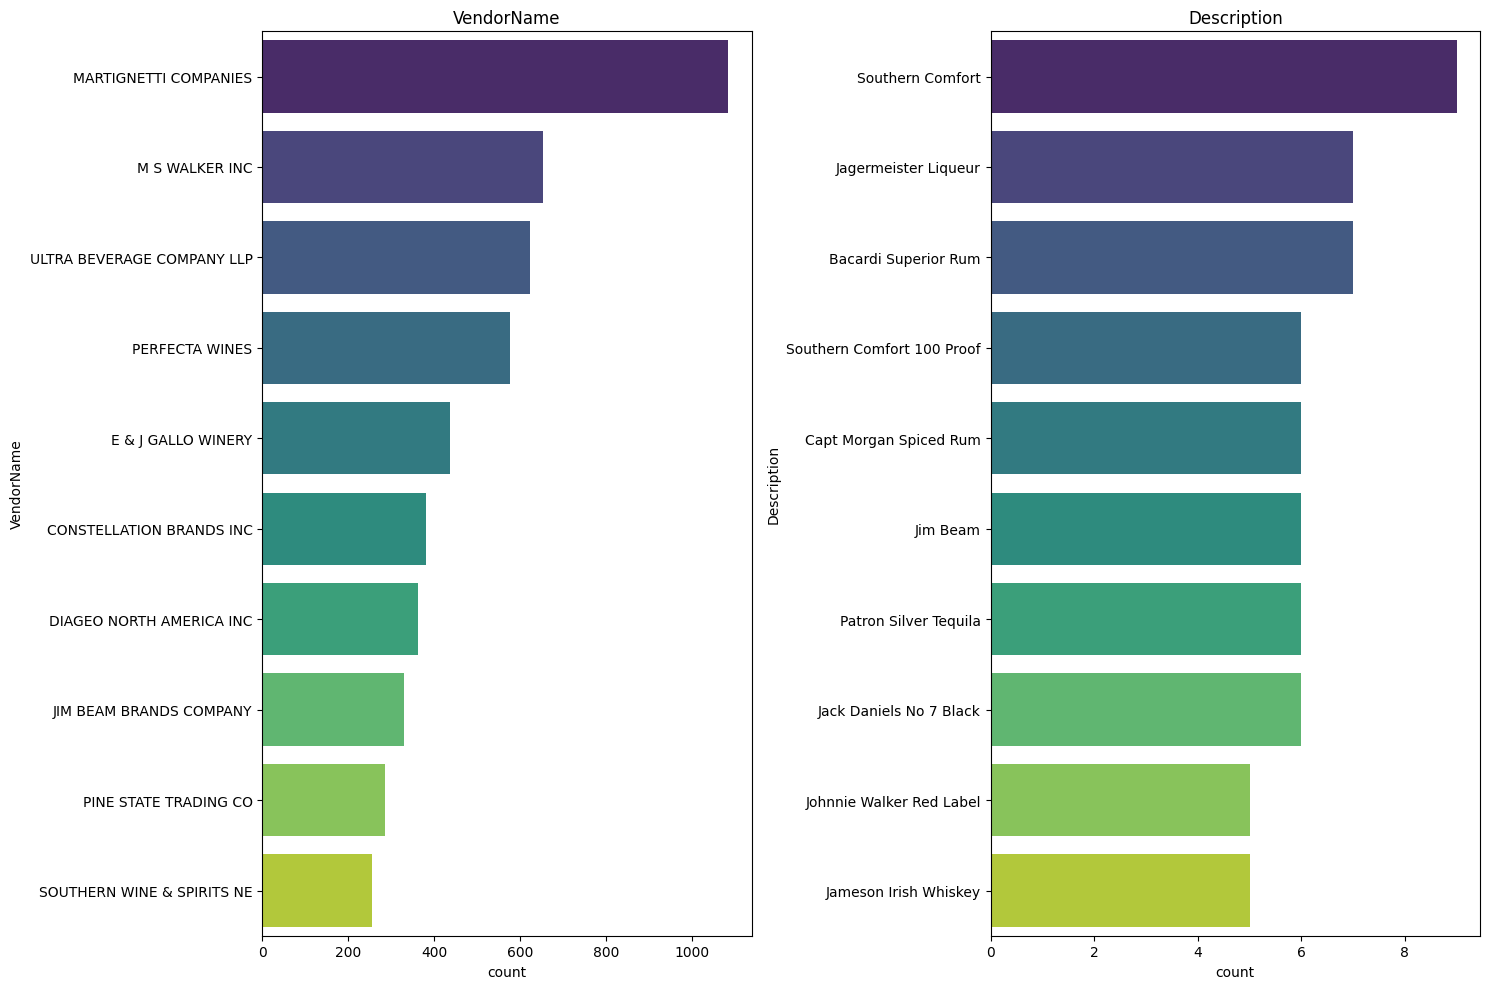

In [24]:
# count plot for categorical columns
categorical_cols=["VendorName","Description"]

plt.figure(figsize=(15, 10))  # Adjust grid layout as needed
for i, col in enumerate(categorical_cols):          
    plt.subplot(1, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], palette='viridis')
    plt.title(col)      
plt.tight_layout()
plt.show()

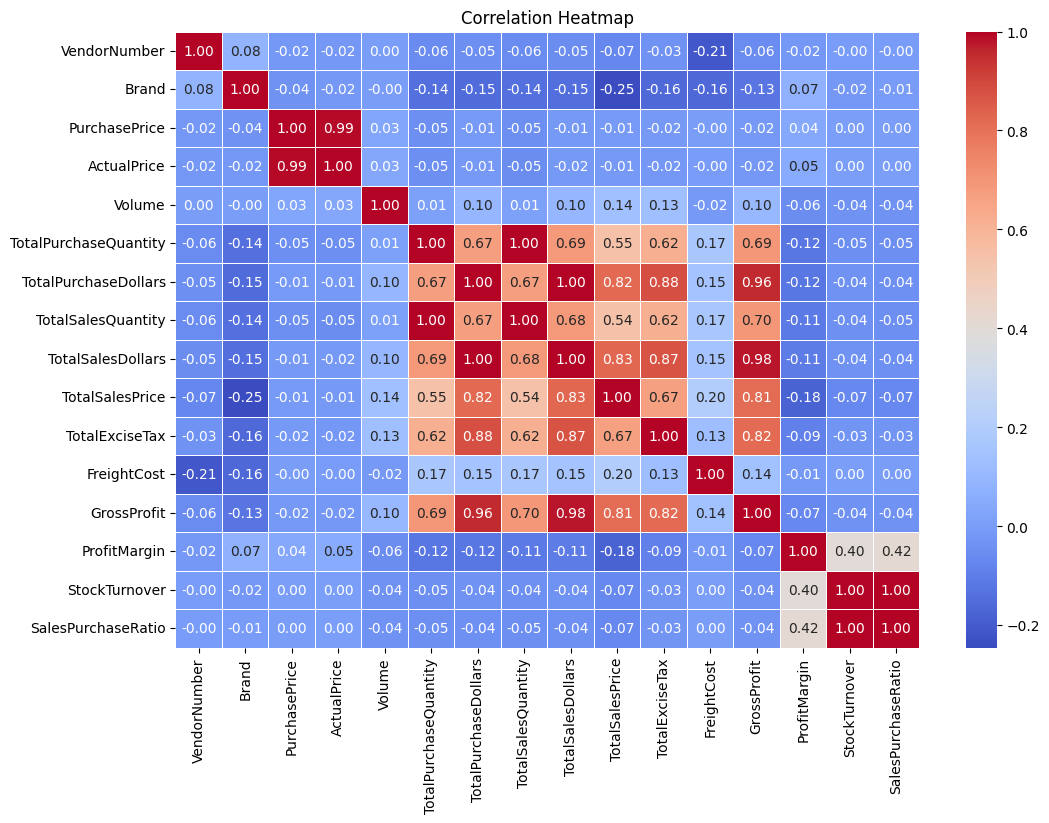

In [29]:
# correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')        
plt.show()  

 

# Correlation Insights
--PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.


--Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.


--Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.


--StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.065), indicating that faster turnover does not necessarily result in higher profitability.

In [40]:
# identify Brand that need Promotional or Price Adjustment which exhibit lower performence but higher profit margins.

brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',        
    'ProfitMargin': 'mean'}).reset_index()

In [41]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [42]:
low_sales_threshold = brand_performance["TotalSalesDollars"].quantile(0.15)


In [43]:
low_sales_threshold

np.float64(560.299)

In [46]:
high_margin_threshold= brand_performance["ProfitMargin"].quantile(0.85)

In [48]:
high_margin_threshold

np.float64(64.97017552750113)

In [53]:
# filter brand with low sales but higher profit

targated_brands = brand_performance[
    (brand_performance["TotalSalesDollars"] <= low_sales_threshold) &
    (brand_performance["ProfitMargin"] >= high_margin_threshold)]

print("Brand with low sales but high profit margines")
display(targated_brands.sort_values('TotalSalesDollars'))     

Brand with low sales but high profit margines


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [56]:
brand_performance=brand_performance[brand_performance["TotalSalesDollars"] < 10000]

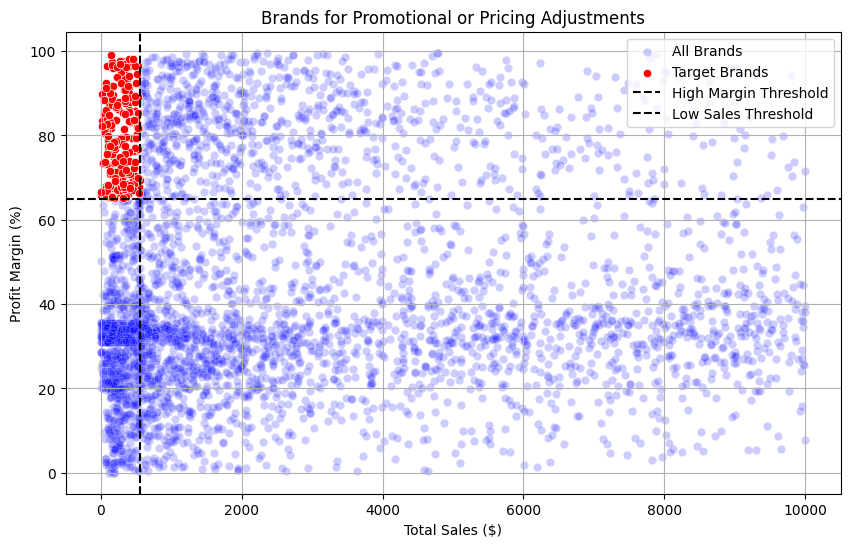

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=targated_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
# which vendor and brands demonstrate the highest sales performance
top_vendors = df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10).reset_index()
top_brands = df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10).reset_index()

In [88]:
top_vendors

,VendorName,TotalSalesDollars
0,DIAGEO NORTH AMERICA INC,6.799010e+07
1,MARTIGNETTI COMPANIES,3.933036e+07
2,PERNOD RICARD USA,3.206320e+07
3,JIM BEAM BRANDS COMPANY,3.142302e+07
4,BACARDI USA INC,2.485482e+07
5,CONSTELLATION BRANDS INC,2.421875e+07
6,E & J GALLO WINERY,1.839990e+07
7,BROWN-FORMAN CORP,1.824723e+07
8,ULTRA BEVERAGE COMPANY LLP,1.650254e+07
9,M S WALKER INC,1.470646e+07


In [89]:
top_brands

,Description,TotalSalesDollars
0,Jack Daniels No 7 Black,7964746.76
1,Tito's Handmade Vodka,7399657.58
2,Grey Goose Vodka,7209608.06
3,Capt Morgan Spiced Rum,6356320.62
4,Absolut 80 Proof,6244752.03
5,Jameson Irish Whiskey,5715759.69
6,Ketel One Vodka,5070083.56
7,Baileys Irish Cream,4150122.07
8,Kahlua,3604858.66
9,Tanqueray,3456697.90


In [90]:
top_brands["FormattedSales"] = top_brands["TotalSalesDollars"].apply(format_dollars)
top_brands



,Description,TotalSalesDollars,FormattedSales
0,Jack Daniels No 7 Black,7964746.76,7.96M
1,Tito's Handmade Vodka,7399657.58,7.40M
2,Grey Goose Vodka,7209608.06,7.21M
3,Capt Morgan Spiced Rum,6356320.62,6.36M
4,Absolut 80 Proof,6244752.03,6.24M
5,Jameson Irish Whiskey,5715759.69,5.72M
6,Ketel One Vodka,5070083.56,5.07M
7,Baileys Irish Cream,4150122.07,4.15M
8,Kahlua,3604858.66,3.60M
9,Tanqueray,3456697.90,3.46M


In [73]:
top_vendors["FormattedSales"] = top_vendors["TotalSalesDollars"].apply(format_dollars)
top_vendors

,VendorName,TotalSalesDollars,FormattedSales
0,DIAGEO NORTH AMERICA INC,6.799010e+07,67.99M
1,MARTIGNETTI COMPANIES,3.933036e+07,39.33M
2,PERNOD RICARD USA,3.206320e+07,32.06M
3,JIM BEAM BRANDS COMPANY,3.142302e+07,31.42M
4,BACARDI USA INC,2.485482e+07,24.85M
5,CONSTELLATION BRANDS INC,2.421875e+07,24.22M
6,E & J GALLO WINERY,1.839990e+07,18.40M
7,BROWN-FORMAN CORP,1.824723e+07,18.25M
8,ULTRA BEVERAGE COMPANY LLP,1.650254e+07,16.50M
9,M S WALKER INC,1.470646e+07,14.71M


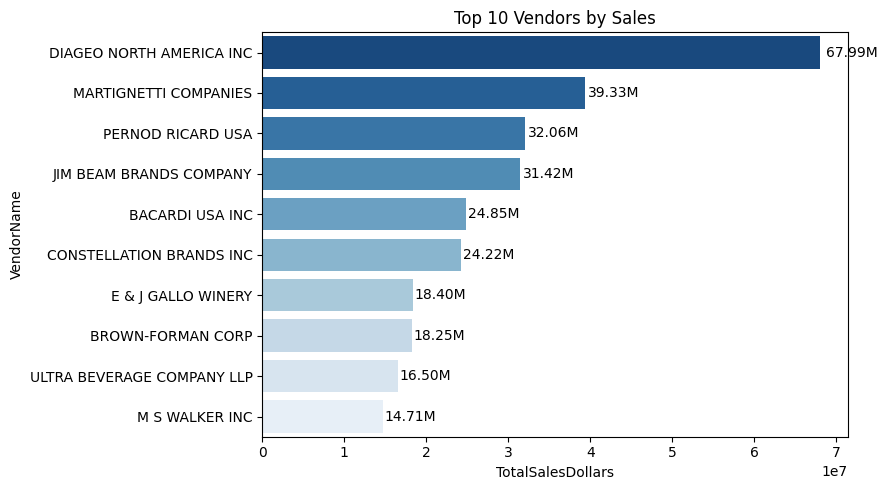

In [79]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    y=top_vendors["VendorName"], 
    x=top_vendors["TotalSalesDollars"], 
    palette="Blues_r"
)
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + bar.get_width() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [83]:
print(top_brands.head())
print(top_brands.dtypes)


   Description  TotalSalesDollars FormattedSales
0          NaN         7964746.76          7.96M
1          NaN         7399657.58          7.40M
2          NaN         7209608.06          7.21M
3          NaN         6356320.62          6.36M
4          NaN         6244752.03          6.24M
Description          float64
TotalSalesDollars    float64
FormattedSales        object
dtype: object


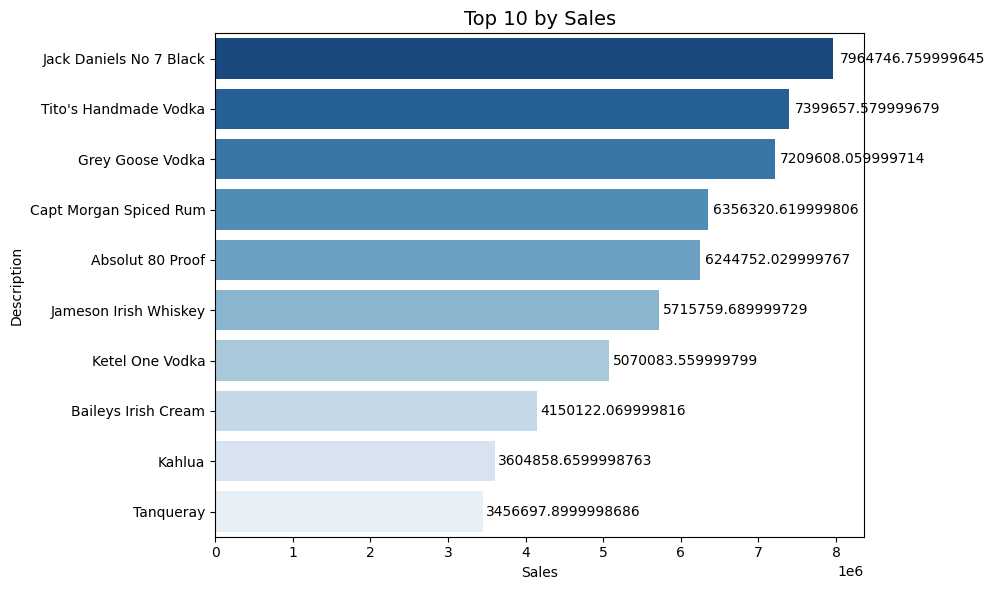

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
top10 = top_brands.sort_values(by='TotalSalesDollars', ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10,
    y='Description',
    x='TotalSalesDollars',  # use numeric for bar height
    palette='Blues_r'
)

plt.title("Top 10 by Sales", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Description")

# Add formatted labels (from 'formatted_sales')
for i, bar in enumerate(ax.patches):
    value = top10['TotalSalesDollars'].iloc[i]
    ax.text(
        bar.get_width() + 0.01 * bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        value,
        va='center',
        ha='left',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [119]:
# which vendor contribute the most to total purchase dollars ?

vendor_performance=df.groupby('VendorName').agg({
    "TotalPurchaseDollars": "sum",
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}
).reset_index()

In [120]:
vendor_performance['PurchaseCountribution%']=vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [121]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCountribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932


In [122]:
vendor_performance = round(vendor_performance.sort_values("PurchaseCountribution%", ascending=False), 2)


In [128]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCountribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.16
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.08
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.08
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.08
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.06
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [129]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCountribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [132]:
top_vendors['PurchaseCountribution%'].sum()*100

np.float64(66.00000000000001)

In [134]:
top_vendors['Cumulative_contribution%'] = top_vendors['PurchaseCountribution%'].cumsum()

In [135]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseCountribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,0.24
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,0.32
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,0.40
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,0.46
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,0.51
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,0.55
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,0.59
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,0.63
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,0.66


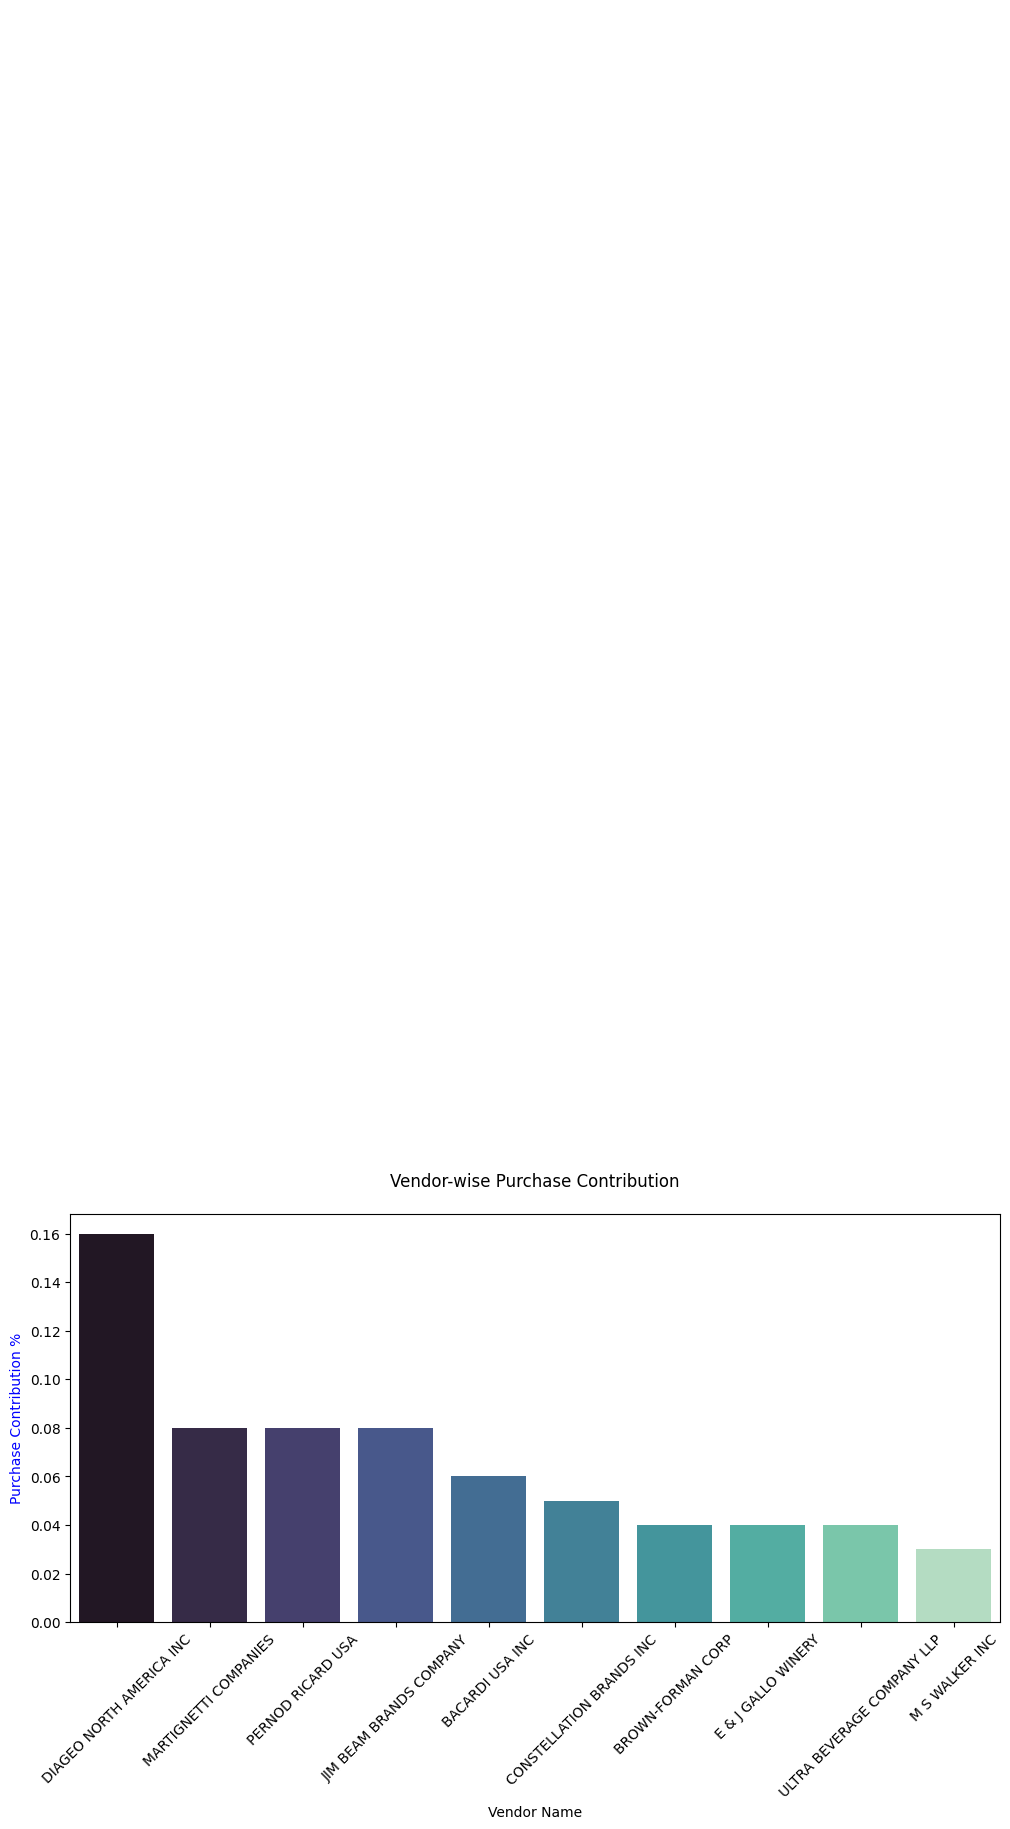

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Barplot: Purchase Contribution %
sns.barplot(x='VendorName', y='PurchaseCountribution%', data=top_vendors, palette='mako', ax=ax)

# Add % labels on bars
for i, value in enumerate(top_vendors['PurchaseCountribution%']):
    ax.text(i, value + 0.5, f'{value:.1f}%', ha='center', fontsize=9, color='white')

# Axis formatting
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Purchase Contribution %', color='blue')
ax.set_xlabel('Vendor Name')
ax.set_title('Vendor-wise Purchase Contribution', pad=20)

# Adjust margins
fig.subplots_adjust(top=0.88, bottom=0.2)

plt.tight_layout()
plt.show()


In [ ]:
# how much of total procurement is depend on the top vendors?

print(f'Total Purchae contribution of top 10 vendor is {round(top_vendors["PurchaseCountribution%"].sum() * 100, 2)}%')

Total Purchae contribution of top 10 vendor is 66.0%


In [153]:
# does purchasing in bulk reduse the unit price and what is the optimal purchase volume for cost savings?

df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalSalesQuantity']

In [155]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['Small', 'Medium', 'Large'])

In [156]:
df['OrderSize']

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    Small
8560    Small
8561    Small
8562    Small
8563    Small
Name: OrderSize, Length: 8564, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [157]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,28.613471
1,Medium,15.514064
2,Large,11.059381


# Order Size
--Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.


--The price difference between Small and Large orders is substantial (~72% reduction in unit cost).


--This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

In [158]:
# Which vendor have low inventory turnover indication excess stockes and slow-moving products ?
df[df['StockTurnover' ]<1].groupby('VendorName')['StockTurnover'].mean().reset_index().sort_values('StockTurnover', ascending=True).head(10)


,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
36,HIGHLAND WINE MERCHANTS LLC,0.708333
60,PARK STREET IMPORTS LLC,0.751306
19,Circa Wines,0.755676
26,Dunn Wine Brokers,0.766022
15,CENTEUR IMPORTS LLC,0.773953
78,SMOKY QUARTZ DISTILLERY LLC,0.783835
90,TAMWORTH DISTILLING,0.797078
91,THE IMPORTED GRAPE LLC,0.807569
101,WALPOLE MTN VIEW WINERY,0.820548


In [159]:
# how much capital is locked in untoled inventory per vendor and  which vendors contribution the most to it?

df["UnsoldInventoryValue"]=(df["TotalPurchaseQuantity"]-df['TotalSalesQuantity'])*df["PurchasePrice"]
print("Total Unsolved Capital:",format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsolved Capital: 2.71M


In [160]:
# aggegrate capital locked per vendor

inventory_value_per_vendor=df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)   
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,0.72K
46,JIM BEAM BRANDS COMPANY,0.55K
68,PERNOD RICARD USA,0.47K
116,WILLIAM GRANT & SONS INC,0.40K
30,E & J GALLO WINERY,0.23K
79,SAZERAC CO INC,0.20K
11,BROWN-FORMAN CORP,0.18K
20,CONSTELLATION BRANDS INC,0.13K
61,MOET HENNESSY USA INC,0.13K
77,REMY COINTREAU USA INC,0.12K


In [161]:
# what is the 95%  confidence interval for profit margines of top-performence and low performence vendors?

top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [162]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]['ProfitMargin'].dropna()

In [163]:
low_vendors

5632     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [164]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3682    85.782102
4751    93.085860
4921    95.012530
5051    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [167]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)  # Mean of the data
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


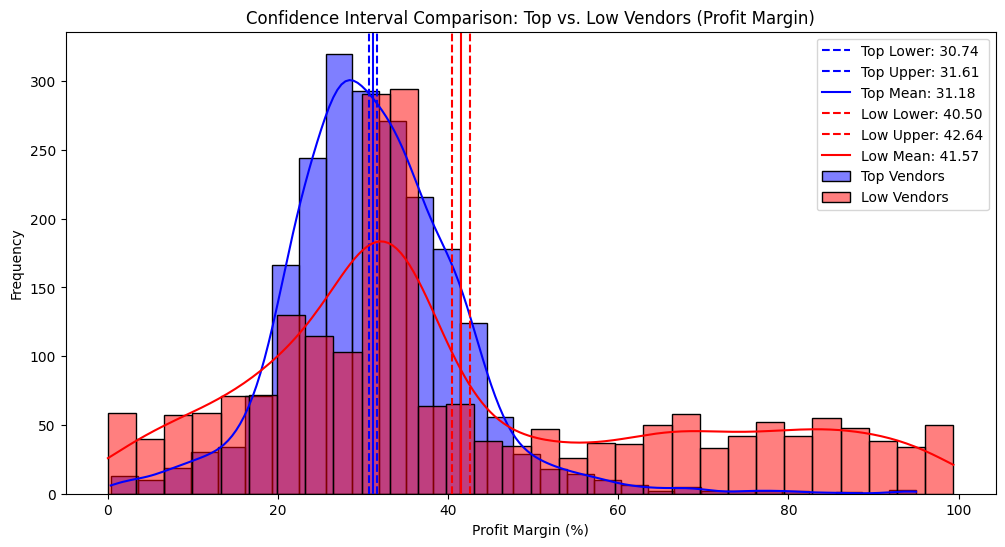

In [168]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()

T---he confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).


---This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.



---For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.



---For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

In [171]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Define thresholds
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Split data
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: Significant difference in profit margins.")
else:
    print("Fail to reject H₀: No significant difference.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: Significant difference in profit margins.
